In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [44]:
# Load dataset (assuming file is loan_data.csv)
df = df = pd.read_csv("C:/Users/keert/Downloads/train.csv")
# Inspect structure
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Shape: (614, 13)

Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

First 5 rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes      

In [45]:
# Check missing values
print("\nMissing values:\n", df.isnull().sum())
print(df.columns)

# Fill missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Drop irrelevant features
# (No Loan_ID column in your dataset, so nothing to drop)

# Encode categorical variables
le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']:
    df[col] = le.fit_transform(df[col])

print("\nData after cleaning:\n", df.head())


Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data after cleaning:
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0


Summary statistics:
            Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000       

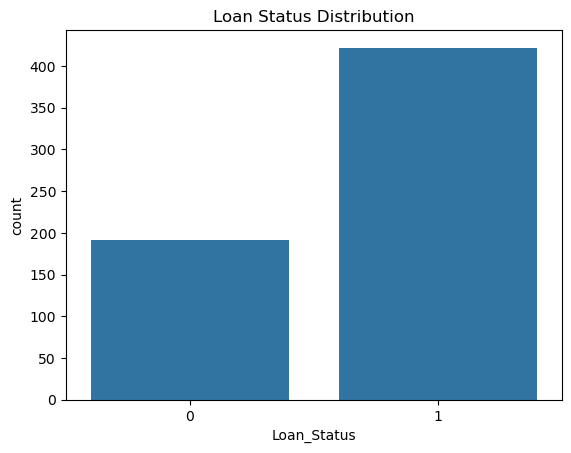

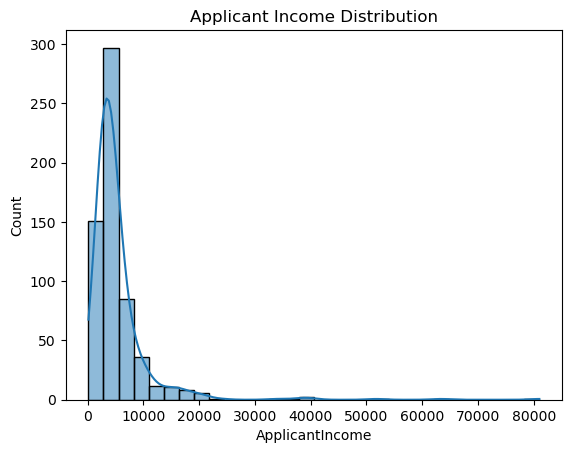

ValueError: could not convert string to float: 'LP001002'

<Figure size 1000x600 with 0 Axes>

In [46]:
# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Countplot for Loan Status
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status Distribution")
plt.show()

# Histogram for Applicant Income
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


In [ ]:
# Scale numerical features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
# Accuracy, Precision, Recall, F1
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Map coefficients to features
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)
